# Praca domowa 7

**10.06.2020r.**

**Agata Makarewicz**

## Wczytanie potrzebnych pakietów

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA

import warnings
warnings.filterwarnings('ignore')

## Wczytanie danych

In [2]:
np.random.seed(123) 

# wczytanie obrazka
img = mpimg.imread('concert.png')
print(img)

[[[0.3254902  0.22352941 0.15686275 1.        ]
  [0.37254903 0.27058825 0.20392157 1.        ]
  [0.34509805 0.24313726 0.1764706  1.        ]
  ...
  [0.1882353  0.22352941 0.24313726 1.        ]
  [0.18431373 0.22745098 0.24313726 1.        ]
  [0.18431373 0.22745098 0.24313726 1.        ]]

 [[0.34901962 0.24705882 0.1882353  1.        ]
  [0.3764706  0.28627452 0.21568628 1.        ]
  [0.35686275 0.25490198 0.1882353  1.        ]
  ...
  [0.1882353  0.22352941 0.24313726 1.        ]
  [0.18431373 0.22745098 0.24313726 1.        ]
  [0.18431373 0.22745098 0.24313726 1.        ]]

 [[0.34509805 0.25490198 0.2        1.        ]
  [0.35686275 0.27450982 0.20784314 1.        ]
  [0.33333334 0.24313726 0.18039216 1.        ]
  ...
  [0.19215687 0.22745098 0.24705882 1.        ]
  [0.1882353  0.23137255 0.24705882 1.        ]
  [0.1882353  0.23137255 0.24705882 1.        ]]

 ...

 [[0.21960784 0.18039216 0.14509805 1.        ]
  [0.19215687 0.15686275 0.12156863 1.        ]
  [0.20784

(1036, 1200, 4)


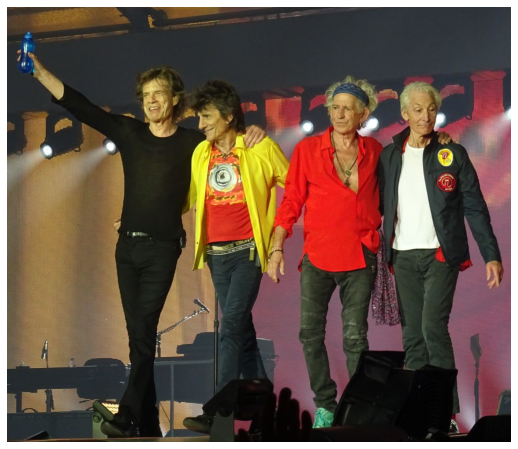

In [3]:
plt.figure(figsize=(12,8))
print(img.shape) 
plt.axis('off') 
plt.imshow(img)

In [4]:
# (1036, 1200, 4) 1036 wierszy, każdy po 1200x4 pikseli 
# 1200*4 = 4800

img_2D = np.reshape(img, (1036, 4800))
print(img_2D.shape)

(1036, 4800)


## Dobranie odpowiedniej liczby komponentów 

W funkcji **PCA()** możemy podać zarówno preferowaną liczbę komponentów (liczba całkowita > 1) lub też procent wyjaśnionej wariancji jaki chcemy uzyskać (liczba z przedziału (0,1)).

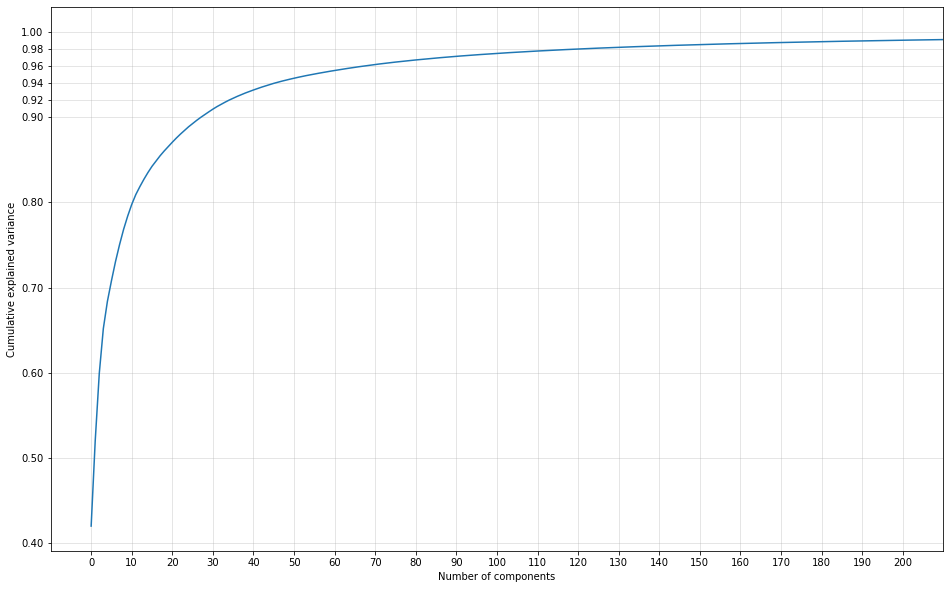

In [5]:
pca_check = PCA().fit(img_2D)

plt.figure(figsize=(16,10))
plt.plot(np.cumsum(pca_check.explained_variance_ratio_)) # skumulowany procent wyjasnionej wariancji
plt.xlim(-10,210) # dalej już naprawde niewielka korzyść ze wzrostem liczby komponentów
plt.grid(alpha=0.4)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98, 1])
plt.xticks(range(0,210,10))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

Jak widzimy na powyższym wykresie, już dla zaledwie 50 komponentów (z 4800) możemy wyjaśnić około 95% procent wariancji. Skoro jednak i tak znacznie zmniejszymy wymiary naszej macierzy, spokojnie możemy celować w około 98 procent wyjaśnionej wariancji - wówczas jakość obrazka nie powinna ulec znacznemu pogorszeniu (mimo znacznej redukcji wymiaru). Według wykresu powinniśmy przyjąć około 120-130 komponentów. Weźmy zatem 125.

In [6]:
pca = PCA(125) 
img_pca = pca.fit(img_2D)
img_transformed = img_pca.transform(img_2D)
print(img_transformed.shape)
print(np.sum(img_pca.explained_variance_ratio_))

(1036, 125)
0.98067486


In [7]:
# zmieniamy wymiary do wizualizacji
new_img = img_pca.inverse_transform(img_transformed)
print(new_img.shape)

# przekształcamy 4800 z powrotem do wyjściowych 1200 * 4
new_img = np.reshape(new_img, (1036,1200,4))

print(new_img.shape)

(1036, 4800)
(1036, 1200, 4)


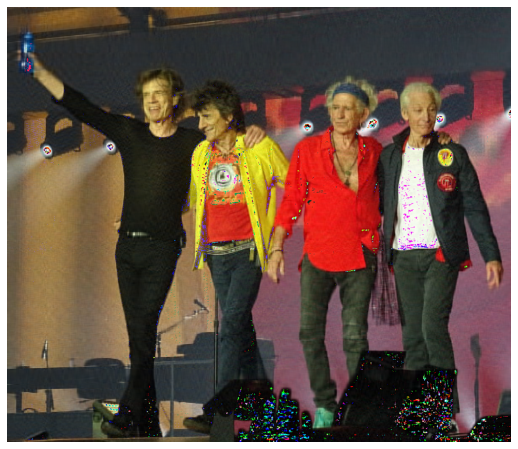

In [8]:
plt.figure(figsize=(12,8))
plt.axis('off') 
plt.imshow((new_img * 255).astype(np.uint8))

Widzimy, że mimo tak znacznej redukcji wymiarów (rozmiaru) obrazka, jego jakość jest całkiem niezła, mimo to widać pewne "przebarwienia".
Spróbujmy zatem zwiększyć liczbę komponentów, ale nadal znacznie ją zmniejszając w porównaniu do wyjściowego obrazka.

In [9]:
pca = PCA(800) 
img_pca = pca.fit(img_2D)
img_transformed = img_pca.transform(img_2D)
print(img_transformed.shape)
print(np.sum(img_pca.explained_variance_ratio_))

(1036, 800)
0.9999335


In [10]:
# zmieniamy wymiary do wizualizacji
new_img = img_pca.inverse_transform(img_transformed)
print(new_img.shape)

# przekształcamy 4800 z powrotem do wyjściowych 1200 * 4
new_img = np.reshape(new_img, (1036,1200,4))

print(new_img.shape)

(1036, 4800)
(1036, 1200, 4)


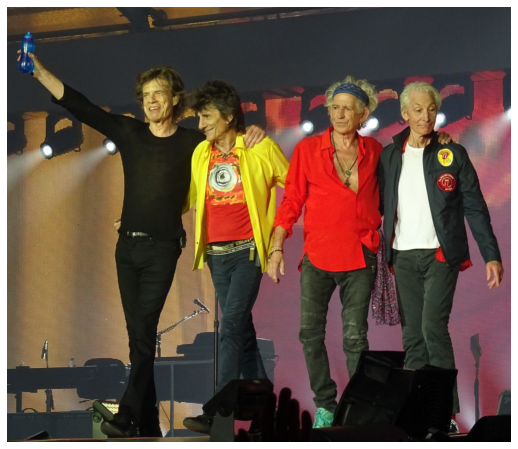

In [11]:
plt.figure(figsize=(12,8))
plt.axis('off') 
plt.imshow((new_img * 255).astype(np.uint8))

Przy 800 komponentach, a więc przy 6-krotnej redukcji wymiaru, otrzymujemy niemalże oryginalny obrazek, gdyż wyjaśniają one praktycznie 100% wariancji (0.9999335). Równiez dla 8-krotnej redukcji (600 komponentów) otrzymujemy już bardzo dobrą jakość, ale wówczas w niektórych miejscach zostają jeszcze drobne "przebarwienia".

# Bonus

In [12]:
# wczytanie danych
data = pd.read_csv('../../signals.tsv', sep="\t", index_col=0) 
data.head()

,signal1,signal2,signal3,signal4
time,,,,
0,0.493428,0.078710,-1.314636,1.193460
1,0.524618,0.791259,-1.321386,-0.075256
2,-0.024396,1.064251,-1.582284,0.785229
3,0.219586,1.007421,-1.481651,0.193773
4,0.426865,0.943133,-1.521795,-0.433458


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   signal1  10000 non-null  float64
 1   signal2  10000 non-null  float64
 2   signal3  10000 non-null  float64
 3   signal4  10000 non-null  float64
dtypes: float64(4)
memory usage: 390.6 KB


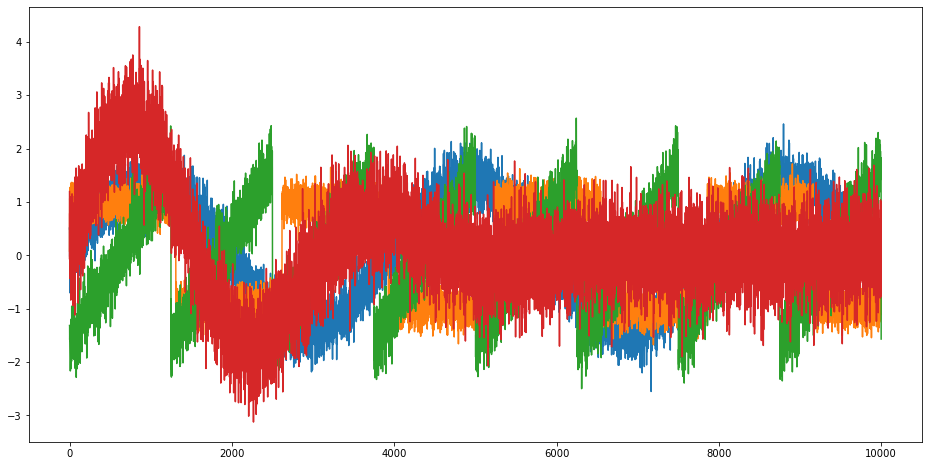

In [14]:
plt.figure(figsize=(16,8))
plt.plot(data)

Plik zawiera 4 pomieszane sygnały, naszym zadaniem będzie ich "odszyfrowanie". Zacznijmy najpierw od standaryzacji naszych dancych.

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=['signal1','signal2','signal3','signal4'])
data_scaled.index.name = 'time'
data_scaled.head()

,signal1,signal2,signal3,signal4
time,,,,
0,0.323341,0.033211,-1.310444,1.051568
1,0.354531,0.745761,-1.317195,-0.217148
2,-0.194483,1.018753,-1.578092,0.643337
3,0.049499,0.961922,-1.477459,0.051881
4,0.256778,0.897635,-1.517603,-0.575350


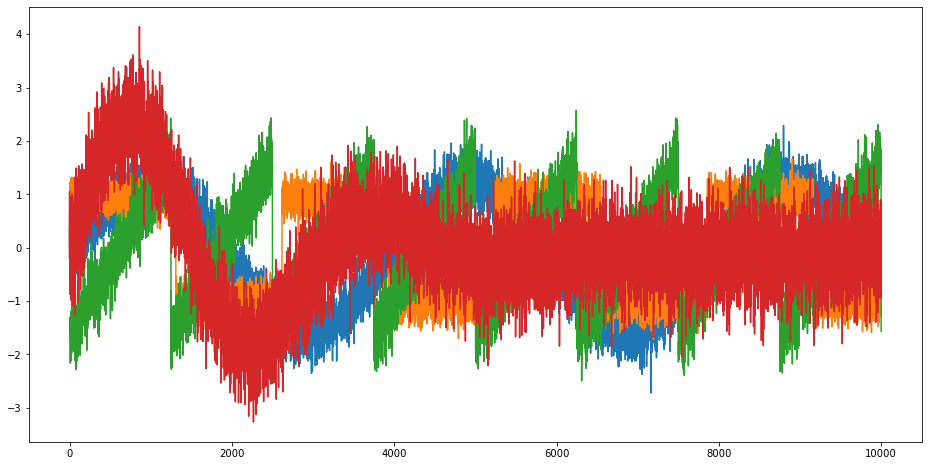

In [16]:
plt.figure(figsize=(16,8))
plt.plot(data_scaled)

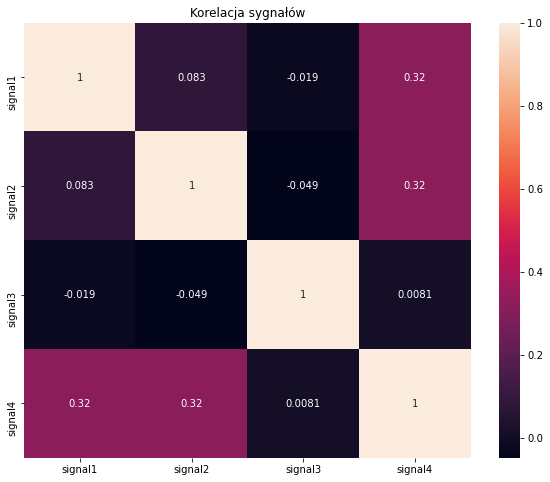

In [17]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=data.columns,
            yticklabels=data.columns, annot=True).set_title("Korelacja sygnałów")
plt.show()

Jak widać, nasze sygnały faktycznie się pomieszały. Do odszyfrowania prawidłowych sygnałów posłużymy się algorytmem ICA - Independent Component Analysis.

In [18]:
ica = FastICA(n_components=4)
signals = ica.fit_transform(data_scaled)

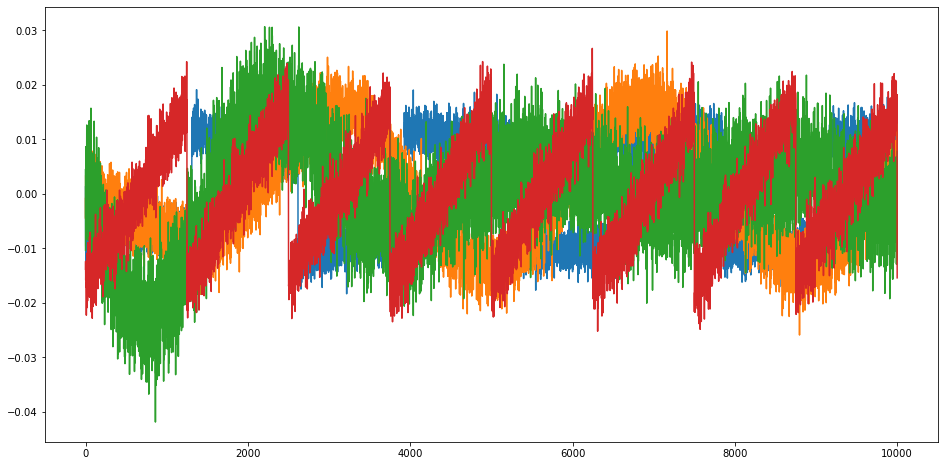

In [19]:
plt.figure(figsize=(16,8))
plt.plot(signals)

In [20]:
signals = pd.DataFrame(signals, columns=['signal1','signal2','signal3','signal4'])
signals.index.name = 'time'
signals.head()
# signals.to_csv("proper_signals.csv")
# jak autor chce to może sobie nawet zapisać do pliku ;)

,signal1,signal2,signal3,signal4
time,,,,
0,0.001298,-0.000838,-0.010320,-0.013829
1,-0.008012,-0.004603,0.004564,-0.012370
2,-0.009507,0.003429,-0.004375,-0.015820
3,-0.009826,-0.000708,0.001951,-0.014223
4,-0.010113,-0.004582,0.008678,-0.014027


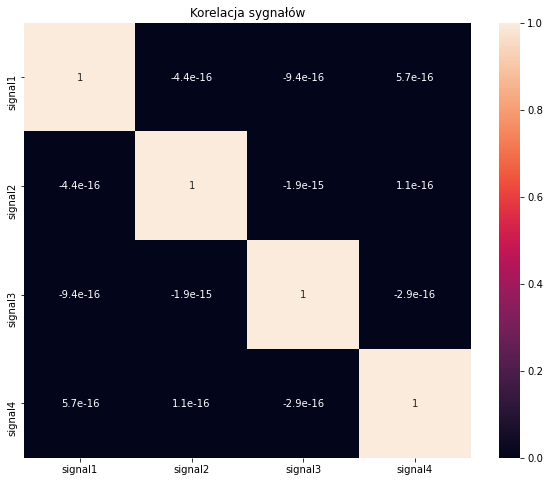

In [21]:
corr=signals.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=signals.columns,
            yticklabels=signals.columns, annot=True).set_title("Korelacja sygnałów")
plt.show()

W wyniku działania ICA otrzymujemy piękne, już nie pomieszane, 4 sygnały :)

## Oświadczenie

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu "Wstęp do uczenia maszynowego" została wykonana przeze mnie samodzielnie.

Agata Makarewicz, 298827